Compute the dynamics induced by 3 body coupling Hamiltonian. Consider modes in 
both x y radial directions. 

In [1]:
#%%
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import Qsim.operator.spin as spin
import Qsim.operator.spin_phonon as sp_op
import Qsim.ion_chain.interaction.spin_phonon as Isp
from  Qsim.ion_chain.ion_system import *
from scipy import signal
import copy

In [2]:
#%% set parameters of ion chain, simulation with com mode only
ion_sys = Ions_asy(trap_config={'N': 3, 'fx': 5, 'fz': 1,'offset':200}, 
                   numeric_config={'active_spin': [0, 1, 2],'active_phonon': [[0],[0]], 'pcut': [[6],[6]]},
                   )
ion_sys.list_para() #print parameters of the system

Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
________________________________________________________________
********************Setup of the Trap************************
number of ions 3
Axial COM (Confining) frequency  1  [MHz]
Radial COM (Confining) frequency  5 [MHz]
Axial vibrational eigenfrequency [1.   1.73 2.41] MHz
Radial (Transverse) vibrational eigenfrequency (1st set) [5.    4.899 4.754] [MHz]
Radial (Transverse) vibrational eigenfrequency (2nd set) [5.2   5.099 4.954] [MHz]
Modulation Amplitude for parameteric amplification:  [0] [V]
Modulation Frequency for parameteric amplification:  [0] [MHz]
Trap dimension parameter:  200 [um]
                      

In [3]:
#%% set parameters of lasers in x
R1 = 26*1e3*2*np.pi #recoil frequency
#compute Dk
Dk1 = np.sqrt(R1*2*MYb171/h) #effective wavenumber
q = 1.3 #compensation scale parameter
delta = 2 #kHz
scale_x = 1 #set this to 0 to disable lasers in x direction
#symmetric beatnote
#blue sideband 1
laserx1 = Laser(config = {'Omega_eff':30,'wavevector':1,'Dk':Dk1,'laser_couple':[0,1,2],
                'mu':2*(delta+1e3*ion_sys.fx),'phase':0})
Omega_r = 5*laserx1.eta(ion_sys.fx)
Omega_b = 2*np.sqrt(3)*Omega_r/laserx1.eta(ion_sys.fx)
laserx1.Omega_eff = Omega_b * scale_x 
#red sideband
laserx2 = copy.copy(laserx1)
laserx2.Omega_eff = Omega_r * scale_x 
laserx2.mu = -1*(delta+1e3*ion_sys.fx)
#compensation beatnote
#compensation blue sideband
laserx3 = copy.copy(laserx1)
laserx3.Omega_eff = np.sqrt(q)*Omega_b*scale_x  
laserx3.mu = 2*(-q*delta+1e3*ion_sys.fx)
#compensation red sideband
laserx4 = copy.copy(laserx1)
laserx4.Omega_eff = np.sqrt(q)*Omega_r*scale_x  
laserx4.mu = -1*(-q*delta+1e3*ion_sys.fx)
print('________________________________________________')
print('Parameteres of laser 1')
laserx1.list_para()
print('________________________________________________')
print('Parameteres of laser 2')
laserx2.list_para()
print('________________________________________________')
print('Parameteres of laser 3')
laserx3.list_para()
print('________________________________________________')
print('Parameteres of laser 4')
laserx4.list_para()
#print(laser1.R/(2*np.pi))
print(laserx2.Omega(ion_sys)/(2*np.pi))

Laser parameters updated
Lasers class object initialized.
________________________________________________
Parameteres of laser 1
                                                                 
********************Parameters of Laser Drive************************
Vibrational degree of freedom couples to the laser: Transverse (Radial x)
index of ions that couple to the laser field:  [0, 1, 2]
Effective rabi frequency  17.32  [kHz]
Effective laser frequency  10004.0  [kHz]
Laser phase phis 0.0
(input in rad but displayed in degs)
________________________________________________
Parameteres of laser 2
                                                                 
********************Parameters of Laser Drive************************
Vibrational degree of freedom couples to the laser: Transverse (Radial x)
index of ions that couple to the laser field:  [0, 1, 2]
Effective rabi frequency  0.36  [kHz]
Effective laser frequency  -5002.0  [kHz]
Laser phase phis 0.0
(input in rad but displa

In [4]:
#%% set parameters of lasers in y
R2 = 26*1e3*2*np.pi #recoil frequency
#compute Dk
Dk2 = np.sqrt(R2*2*MYb171/h) #effective wavenumber
q = 1.3 #compensation scale parameter
delta = 2 #kHz
scale_y = 1 #set this to 0 to disable lasers in y direction
#symmetric beatnote
#blue sideband 1
lasery1 = Laser(config = {'Omega_eff':30,'wavevector':2,'Dk':Dk2,'laser_couple':[0,1,2],
                'mu':2*(delta+1e3*ion_sys.radial_freq2[0]),'phase':0})
#Rabi frequencies are set such that the coupling strength is the same as in x direction
Omega_b = 2*np.sqrt(3)*Omega_r/lasery1.eta(ion_sys.radial_freq2[0])
lasery1.Omega_eff = Omega_b*scale_y 
#red sideband
lasery2 = copy.copy(lasery1)
lasery2.Omega_eff = Omega_r*scale_y
lasery2.mu = -1*(delta+1e3*ion_sys.radial_freq2[0])
#compensation beatnote
#compensation blue sideband
lasery3 = copy.copy(lasery1) 
lasery3.Omega_eff = np.sqrt(q)*Omega_b *scale_y
lasery3.mu = 2*(-q*delta+1e3*ion_sys.radial_freq2[0])
#compensation red sideband
lasery4 = copy.copy(lasery1)
lasery4.Omega_eff = np.sqrt(q)*Omega_r*scale_y
lasery4.mu = -1*(-q*delta+1e3*ion_sys.radial_freq2[0])
print('________________________________________________')
print('Parameteres of laser 1')
lasery1.list_para()
print('________________________________________________')
print('Parameteres of laser 2')
lasery2.list_para()
print('________________________________________________')
print('Parameteres of laser 3')
lasery3.list_para()
print('________________________________________________')
print('Parameteres of laser 4')
lasery4.list_para()
#print(laser1.R/(2*np.pi))
print(lasery2.Omega(ion_sys)/(2*np.pi))
N = 3

Laser parameters updated
Lasers class object initialized.
________________________________________________
Parameteres of laser 1
                                                                 
********************Parameters of Laser Drive************************
Vibrational degree of freedom couples to the laser: Transverse (Radial y)
index of ions that couple to the laser field:  [0, 1, 2]
Effective rabi frequency  17.66  [kHz]
Effective laser frequency  10404.0  [kHz]
Laser phase phis 0.0
(input in rad but displayed in degs)
________________________________________________
Parameteres of laser 2
                                                                 
********************Parameters of Laser Drive************************
Vibrational degree of freedom couples to the laser: Transverse (Radial y)
index of ions that couple to the laser field:  [0, 1, 2]
Effective rabi frequency  0.36  [kHz]
Effective laser frequency  -5202.0  [kHz]
Laser phase phis 0.0
(input in rad but displa

In [9]:
#%%Reproduce plot 2(d), only consider com mode
def Tthree(eta0, wr,wb,delta0,q):
    J32 = (1+np.sqrt(1/q))*(eta0**4*wr**2*wb)/(16*delta0**2)
    return np.pi/(6*J32)
eta_com = laserx1.eta(ion_sys.fx)/np.sqrt(3)
print('predicted period, [ms]')
print(Tthree(eta_com,laserx2.Omega(ion_sys),laserx1.Omega(ion_sys),delta*2*np.pi,q))

predicted period, [ms]
157.49177914804858


In [5]:
#%%compute rwa critirion
delta_omega = (np.max(ion_sys.radial_freq)- np.min(ion_sys.radial_freq))*1000
rwa_fc = fr_conv(2*q*(delta_omega+delta+10),'Hz') 
print('RWA critrion frequency: '+ str(np.round(rwa_fc/(2*np.pi),2))+' [kHz]')
#10 is an additional factor to make sure all frequencies are included

RWA critrion frequency: 670.94 [kHz]


In [6]:
#%% construct Hamiltonian 
laser_list_x = [laserx1,laserx2,laserx3,laserx4]
laser_list_y = [lasery1,lasery2,lasery3,lasery4]
arg_com_x = Isp.H_td_argdic_general(ion0 = ion_sys, laser_list=laser_list_x)
arg_com_y = Isp.H_td_argdic_general(ion0 = ion_sys, laser_list=laser_list_y)
arg_com = arg_com_x | arg_com_y
Heff_com = Isp.H_td_multi_drives_asy(ion_sys, laser_list=[laser_list_x,laser_list_y],
                                     second_order=True,
                              rwa=True,arg_dic=arg_com,f_crit=rwa_fc ) #construct time-dependent H
#print('number of terms,', len(Heff1))
#construct initial state (down down down)
spin_config = np.array([1,1,1])
psi1 =  sp_op.ini_state(ion_sys,s_state = spin_config, p_state = [[0],[0]], state_type=1)
elist_com = [tensor(spin.sz(N,0),sp_op.p_I(ion_sys)),
          tensor(spin.sz(N,1),sp_op.p_I(ion_sys)),
          tensor(spin.sz(N,2),sp_op.p_I(ion_sys))]

In [9]:
#%%solve time dependent SE
times =  np.arange(0,80,1e-3)
print('______________________________________________________________________')
print('solving SE with time-dependent H')
result1 = sesolve(Heff_com,psi1,times,args = arg_com,progress_bar=True,options=Options(nsteps=10000))      

______________________________________________________________________
solving SE with time-dependent H
10.0%. Run time:   5.27s. Est. time left: 00:00:00:47
20.0%. Run time:  10.56s. Est. time left: 00:00:00:42
30.0%. Run time:  15.67s. Est. time left: 00:00:00:36
40.0%. Run time:  20.37s. Est. time left: 00:00:00:30
50.0%. Run time:  24.69s. Est. time left: 00:00:00:24
60.0%. Run time:  28.89s. Est. time left: 00:00:00:19
70.0%. Run time:  33.47s. Est. time left: 00:00:00:14
80.0%. Run time:  38.63s. Est. time left: 00:00:00:09
90.0%. Run time:  43.98s. Est. time left: 00:00:00:04
Total run time:  49.22s


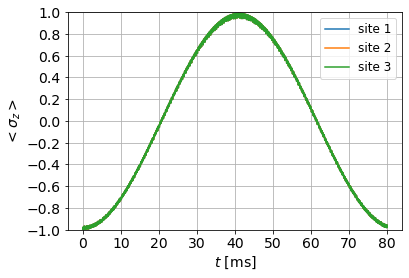

In [10]:
#%%
#plot spin evolution
p1 = expect(elist_com[0],result1.states)
p2 = expect(elist_com[1],result1.states)
p3 = expect(elist_com[2],result1.states)
plt.plot(times,p1,label = 'site 1')
plt.plot(times,p2,label = 'site 2')
plt.plot(times,p3,label = 'site 3')
plt.xlabel(r'$t$ [ms]',fontsize = 14)
plt.ylabel(r'$<\sigma_{z}>$',fontsize = 14)
plt.ylim(-1,1)
plt.yticks(np.arange(-1,1.2,0.2),fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 12)
plt.grid()
plt.show()

Estimated phonon cutoff error:  0.00031


<Figure size 432x288 with 0 Axes>

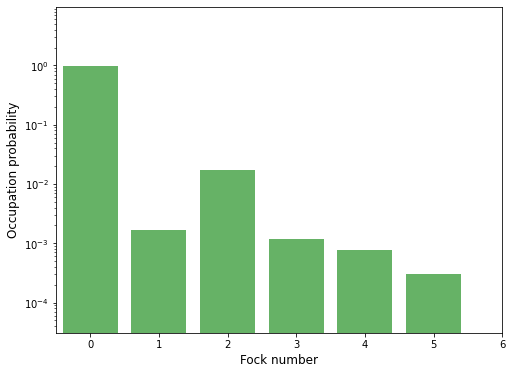

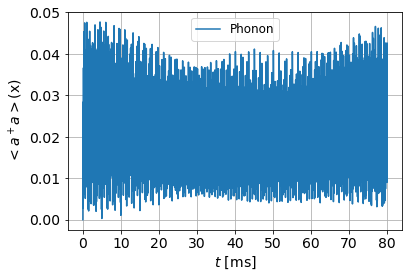

In [11]:
#%%phonon evolution
#x phonon modes
sp_op.phonon_cutoff_error(result1.states, ion_sys, df=1, mindex=0,plot=True)
pplot = expect(sp_op.phonon_measure(ion_sys,1,mindex=0), result1.states)
plt.plot(times,pplot,label = 'Phonon')
plt.xlabel(r'$t$ [ms]',fontsize = 14)
#title = r'$\delta_{com} = $'+str(ion_sys.delta)+' kHz'
plt.ylabel(r'$<a^+ a>$(x)',fontsize = 14)
#plt.title(title,fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 12)
plt.grid()
plt.show()

Estimated phonon cutoff error:  0.00031


<Figure size 432x288 with 0 Axes>

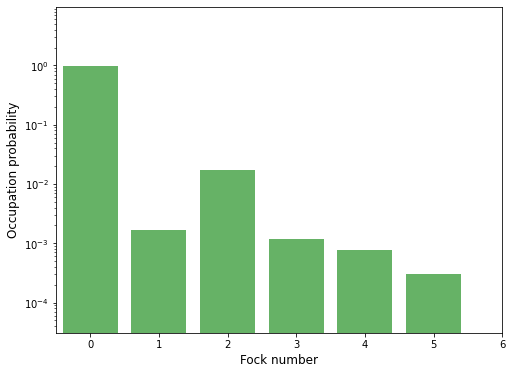

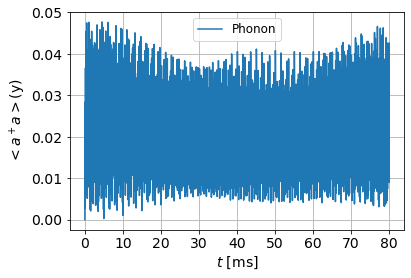

In [12]:
#%%phonon evolution
#y phonon modes
sp_op.phonon_cutoff_error(result1.states, ion_sys, df=2, mindex=0,plot=True)
pplot = expect(sp_op.phonon_measure(ion_sys,2,mindex=0), result1.states)
plt.plot(times,pplot,label = 'Phonon')
plt.xlabel(r'$t$ [ms]',fontsize = 14)
#title = r'$\delta_{com} = $'+str(ion_sys.delta)+' kHz'
plt.ylabel(r'$<a^+ a>$(y)',fontsize = 14)
#plt.title(title,fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 12)
plt.grid()
plt.show()